## EXPLORACION DEL TITANIC

- Extracción de datos: cargaremos el conjunto de datos y le echaremos un primer vistazo.
- Limpieza: completaremos los valores faltantes.
- Graficación: crearemos algunos gráficos interesantes que (con suerte) revelarán correlaciones e ideas ocultas en los datos.
- Suposiciones: formularemos hipótesis a partir de los gráficos.
- Feature Engineering: aquí manipularemos y transformaremos características existentes o crearemos nuevas características que puedan mejorar el rendimiento del modelo.
- Models & Training: En esta etapa, entrenaremos varios modelos de aprendizaje automático utilizando los datos preparados y evaluaremos su rendimiento para seleccionar el modelo más adecuado.

### IMPORTS

In [102]:
#referencia https://www.ahmedbesbes.com/blog/kaggle-titanic-competition
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

### 1. (ETL) EXTRACCIÓN DE DATOS

- En esta etapa simplemente cargamos los datos desde un archivo CSV.

In [161]:
#cargar el training set
data = pd.read_csv('train.csv')

- Echamos un vistazo inicial a su estructura utilizando la función shape, head, sample, describe.

In [162]:
data.shape

(891, 12)

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [165]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S


In [166]:
#describir los datos - faltan registros
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Creamos nan_sum que contendrá la cantidad de valores faltantes en cada columna del DataFrame data, lo que proporcionará información importante sobre la calidad y sí los datos estan completos.

In [167]:
# Calcular la suma de NaN por columna
nan_sum = data.isna().sum()
nan_sum

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Tenemos tres problemas como completar los 177 values, Cabin con 687 datos faltantes y dos de la columna Embarked.
- Una solución es completar los valores nulos con la mediana de la edad. También podríamos imputar con la edad media, pero la mediana es más robusta ante valores atípicos.

In [168]:
#llenar el resto con la mediana
data['Age'] = data['Age'].fillna(data['Age'].median())
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Este gráfico proporcionará una visualización de la cantidad de personas que sobrevivieron y murieron, por género.
- Las barras apiladas muestran la proporción de sobrevivientes y fallecidos dentro de cada género.

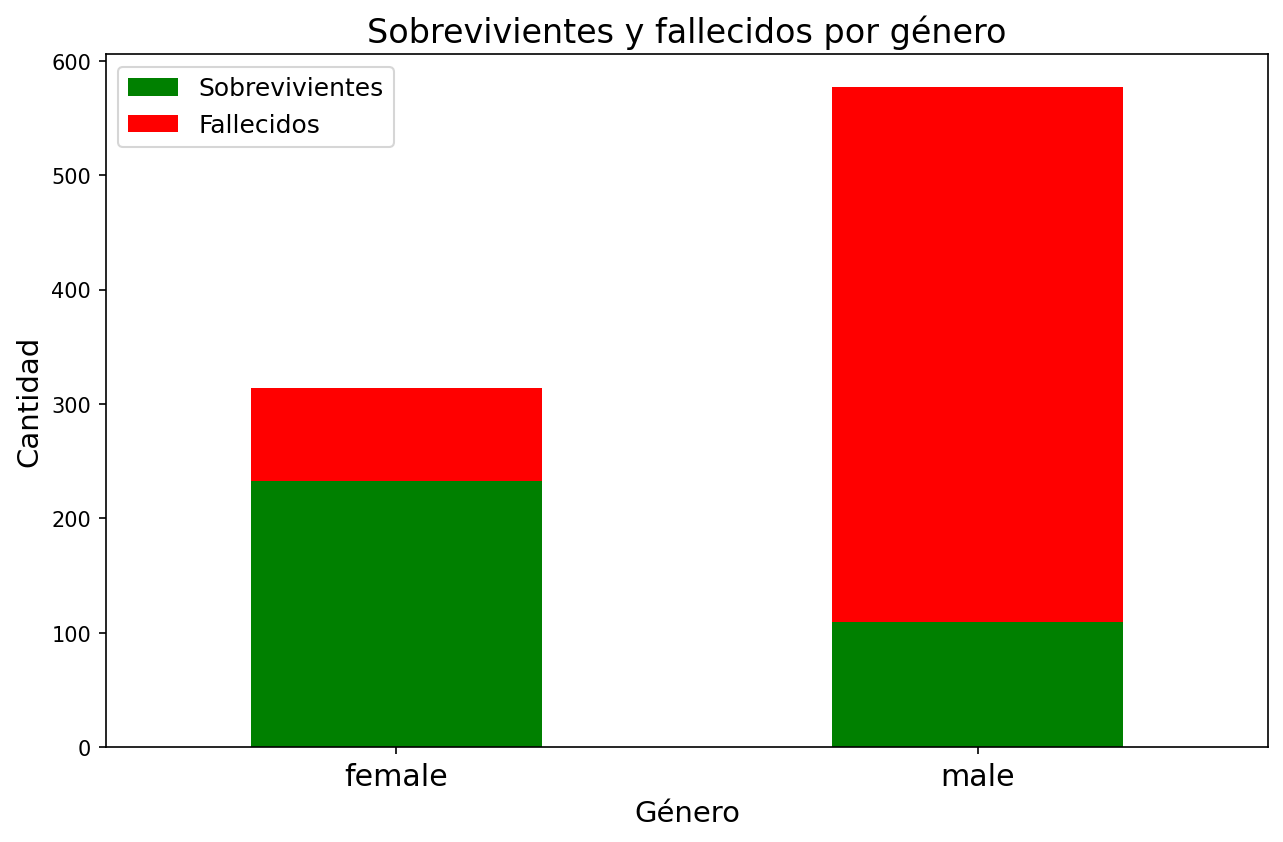

In [169]:
# Visualización - supervivencia por género

# Calcula la columna 'Died'
data['Died'] = 1 - data['Survived']

# Agrupa por género y suma los valores de 'Survived' y 'Died'
survival_by_gender = data.groupby('Sex').agg('sum')[['Survived', 'Died']]

# Ploteamos
ax = survival_by_gender.plot(kind='bar', stacked=True, color=['g', 'r'], figsize=(10, 6))

# Añade etiquetas y título
plt.title('Sobrevivientes y fallecidos por género', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=0)
plt.legend(['Sobrevivientes', 'Fallecidos'], fontsize=12)

**Como observamos en el gráfico anterior y validamos con la información siguiente:**

**Las mujeres tienen una tasa de supervivencia mayor que los hombres, como se muestra en el histograma verde más grande para las mujeres.**

- El siguiente generará un gráfico de violín que muestra la distribución de las edades de los pasajeros, desglosada por género y coloreada según si sobrevivieron o no.

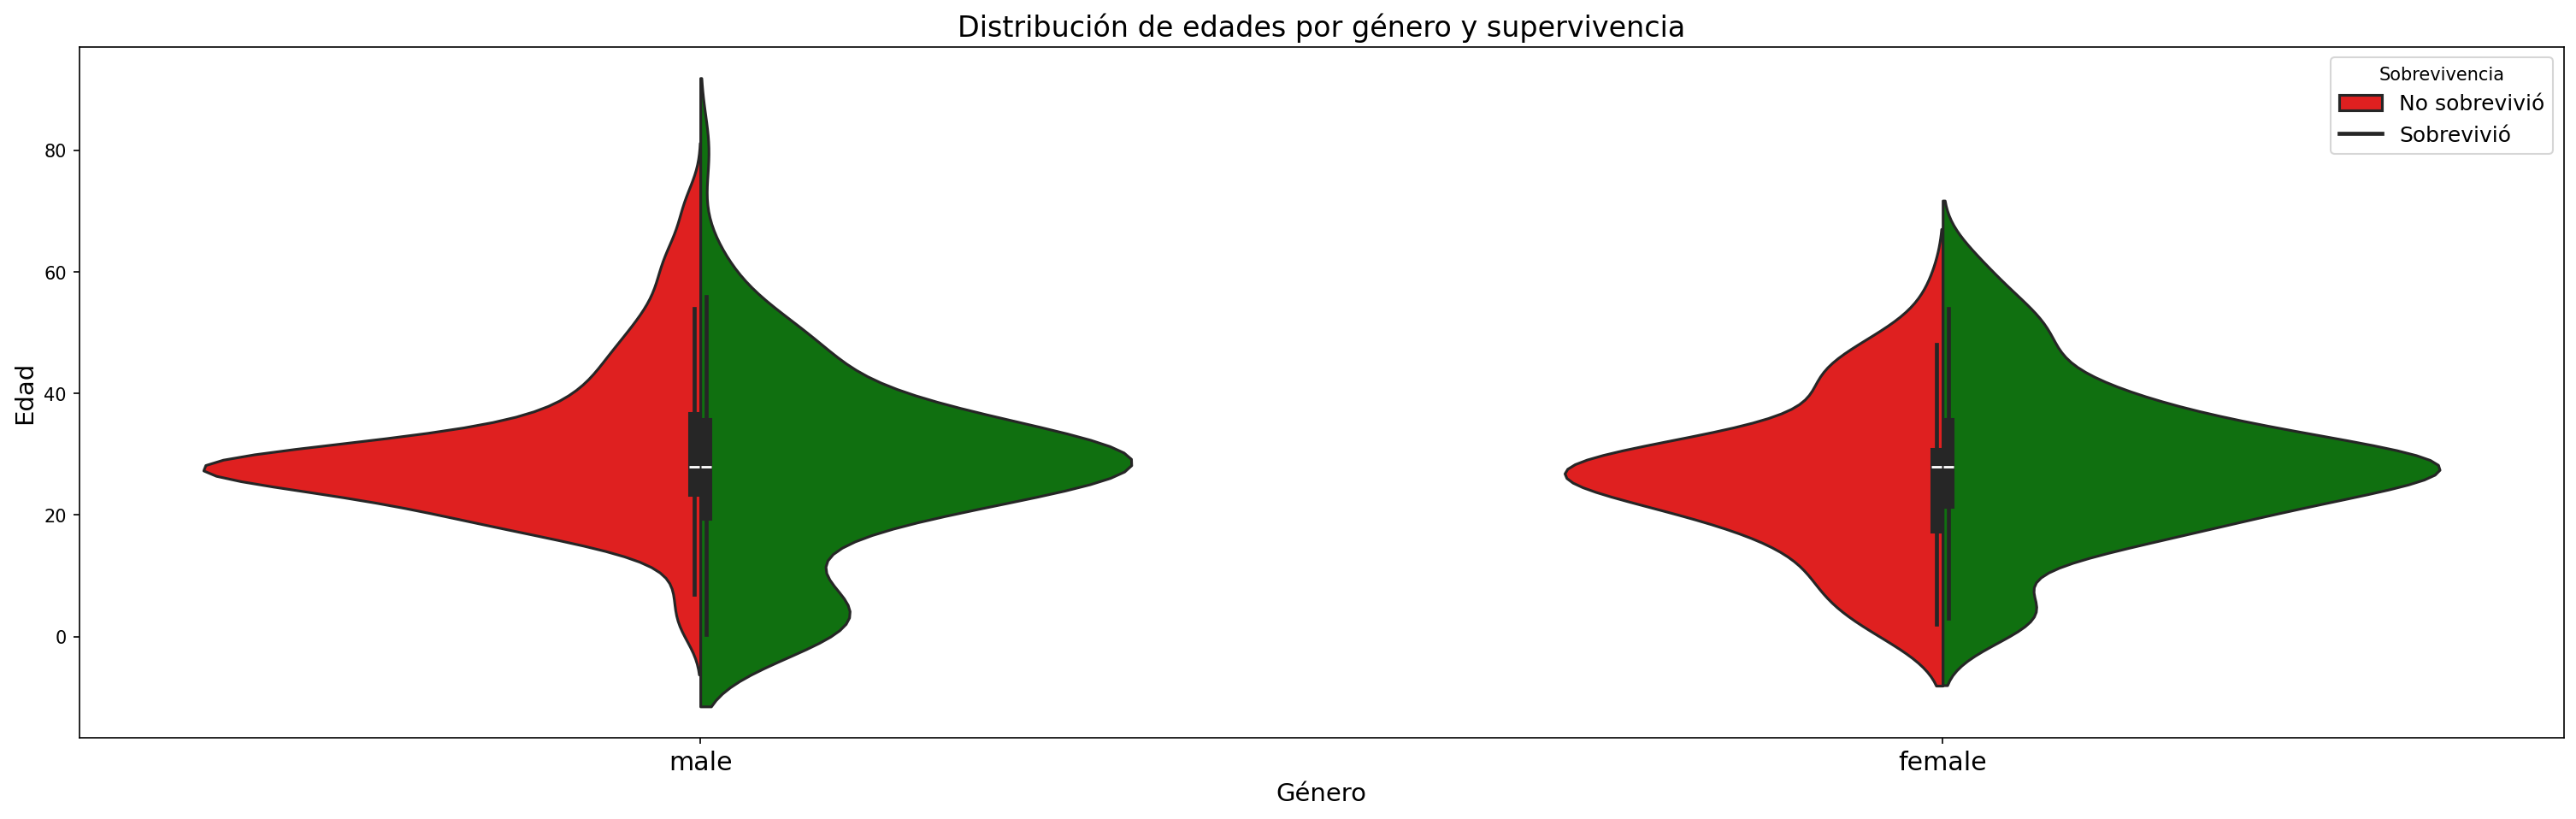

In [170]:
# Correlación - supervivencia por edad
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"}, linewidth=1.5)

# Crear la figura y el gráfico de violín
# Añadir etiquetas y título
plt.title('Distribución de edades por género y supervivencia', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Edad', fontsize=14)

# Ajustar la leyenda
plt.legend(title='Sobrevivencia', loc='upper right', labels=['No sobrevivió', 'Sobrevivió'], fontsize=12)

**Ahora, notamos que:**

- **La edad condiciona la supervivencia de los pasajeros masculinos:**
  - **Los hombres más jóvenes tienden a sobrevivir.**
  - **Un gran número de pasajeros entre 20 y 40 años sucumben.**
  
- **La edad no parece tener un impacto directo en la supervivencia de las mujeres.**

***Estos gráficos de violín confirman una antigua norma de conducta que los marineros y capitanes siguen en situaciones amenazadoras: "¡Mujeres y niños primero!".***

- Este código busca utilizar un histograma para visualizar la distribución de las tarifas pagadas por los pasajeros que sobrevivieron (en verde) y los que fallecieron (en rojo).

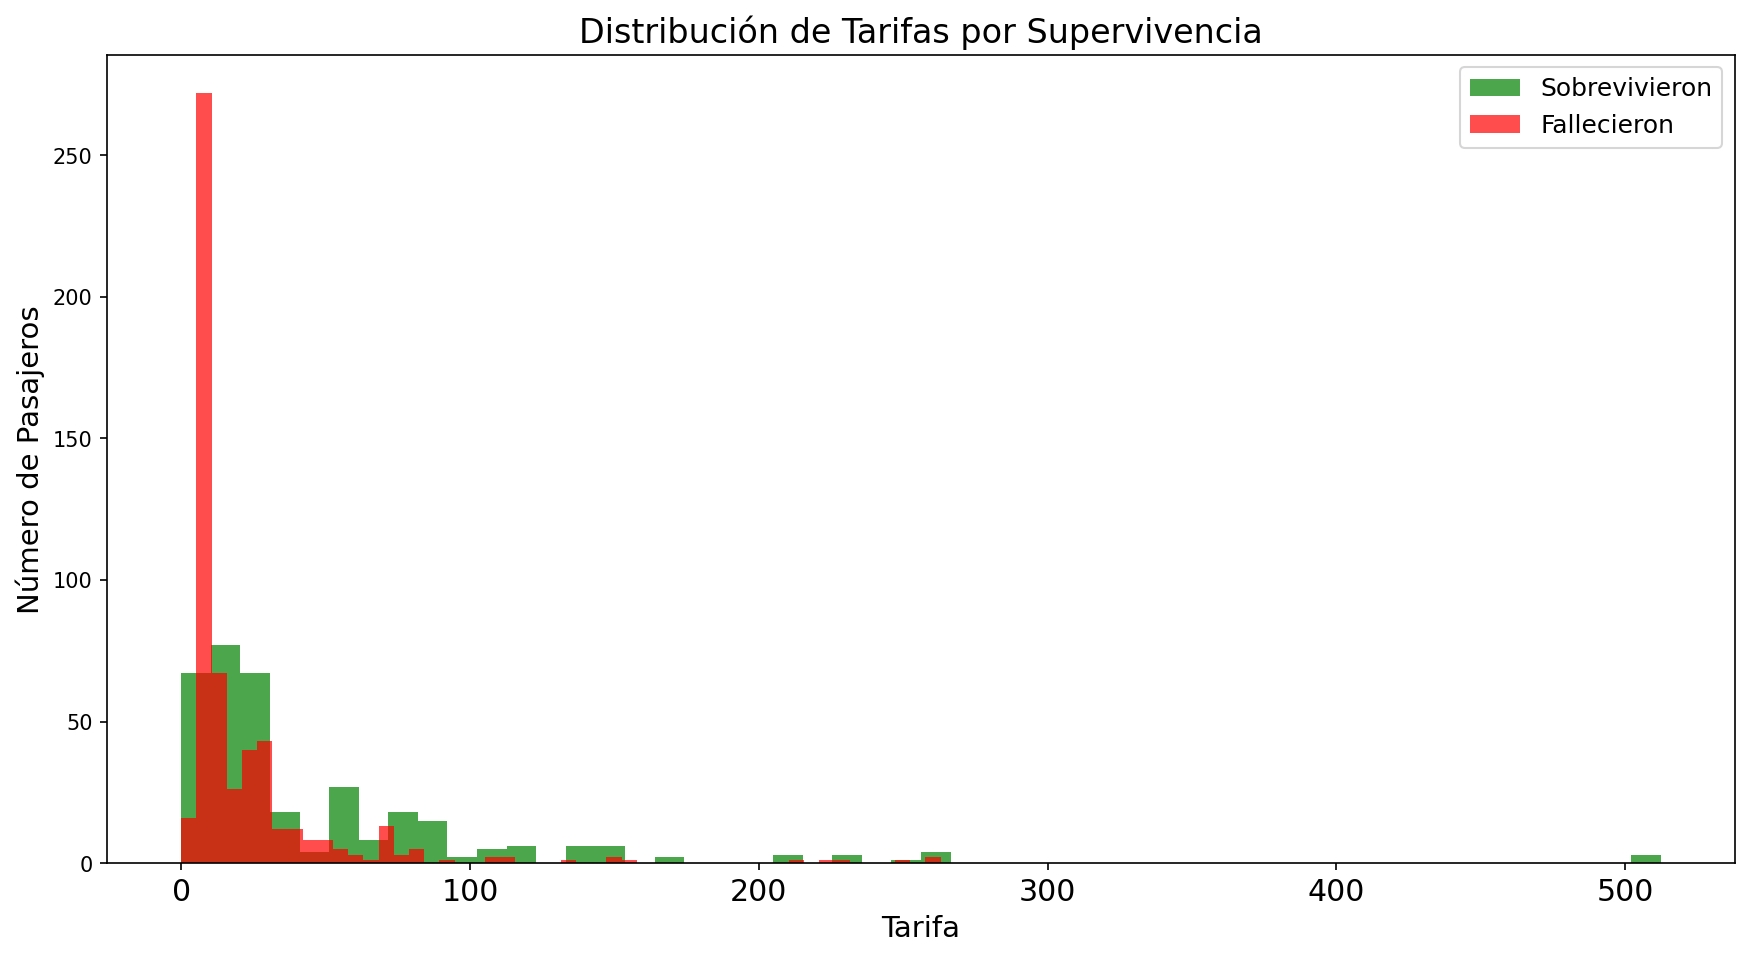

In [171]:
#encontrar relación entre precio y supervivencia
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(14, 7))

# Histograma de pasajeros que sobrevivieron
ax.hist(data[data['Survived'] == 1]['Fare'], bins=50, color='g', alpha=0.7, label='Sobrevivieron')

# Histograma de pasajeros que no sobrevivieron
ax.hist(data[data['Survived'] == 0]['Fare'], bins=50, color='r', alpha=0.7, label='Fallecieron')

# Añadir etiquetas y título
ax.set_xlabel('Tarifa', fontsize=14)
ax.set_ylabel('Número de Pasajeros', fontsize=14)
ax.set_title('Distribución de Tarifas por Supervivencia', fontsize=16)

# Añadir leyenda
ax.legend(loc='upper right', fontsize=12)

**Lo que deduciomos de este grafico es que los pasajeros con tarifas de boletos más baratas tienen más probabilidades de fallecer. En otras palabras, los pasajeros con boletos más caros, y por lo tanto, un estatus social más importante, parecen ser rescatados primero.**

- Este gráfico muestra la relación entre la edad de los pasajeros, el precio del pasaje y la supervivencia.
- Cada punto en el gráfico representa a un pasajero, donde el eje x muestra la edad, el eje y muestra el precio del pasaje y el color del punto indica si el pasajero sobrevivió (verde) o no (rojo).
- Además, el tamaño de los puntos está escalado por la tarifa pagada por el pasajero.

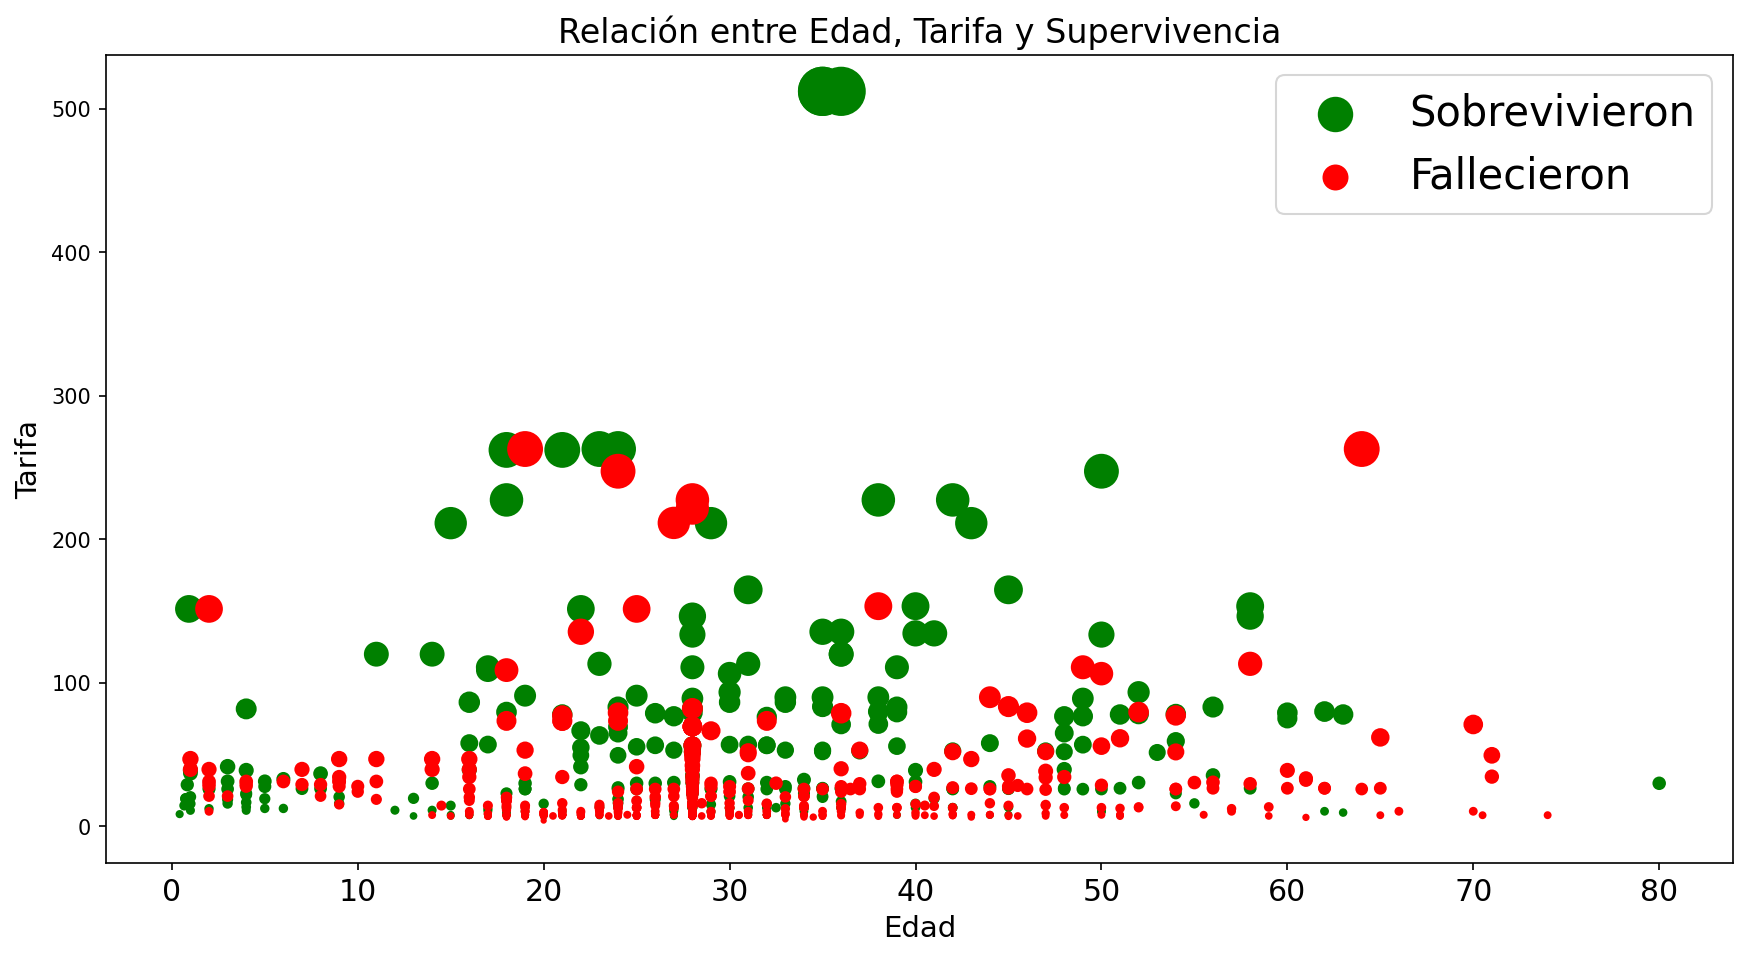

In [172]:
#combinar edad y precio 
# Crear una nueva figura con un tamaño específico
plt.figure(figsize=(14, 7))

# Crear un eje
ax = plt.subplot()

# Dibujar puntos para los pasajeros que sobrevivieron (verdes)
ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='green', s=data[data['Survived'] == 1]['Fare'], label='Sobrevivieron')

# Dibujar puntos para los pasajeros que no sobrevivieron (rojos)
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='red', s=data[data['Survived'] == 0]['Fare'], label='Fallecieron')

# Añadir etiquetas y título
ax.set_xlabel('Edad', fontsize=14)
ax.set_ylabel('Tarifa', fontsize=14)
ax.set_title('Relación entre Edad, Tarifa y Supervivencia', fontsize=16)

# Añadir leyenda
ax.legend()

**Esta visualización ayuda a identificar cualquier patrón o correlación entre la edad, la tarifa y la supervivencia de los pasajeros del Titanic.**

<Axes: xlabel='Pclass', ylabel='Tarifa Promedio'>

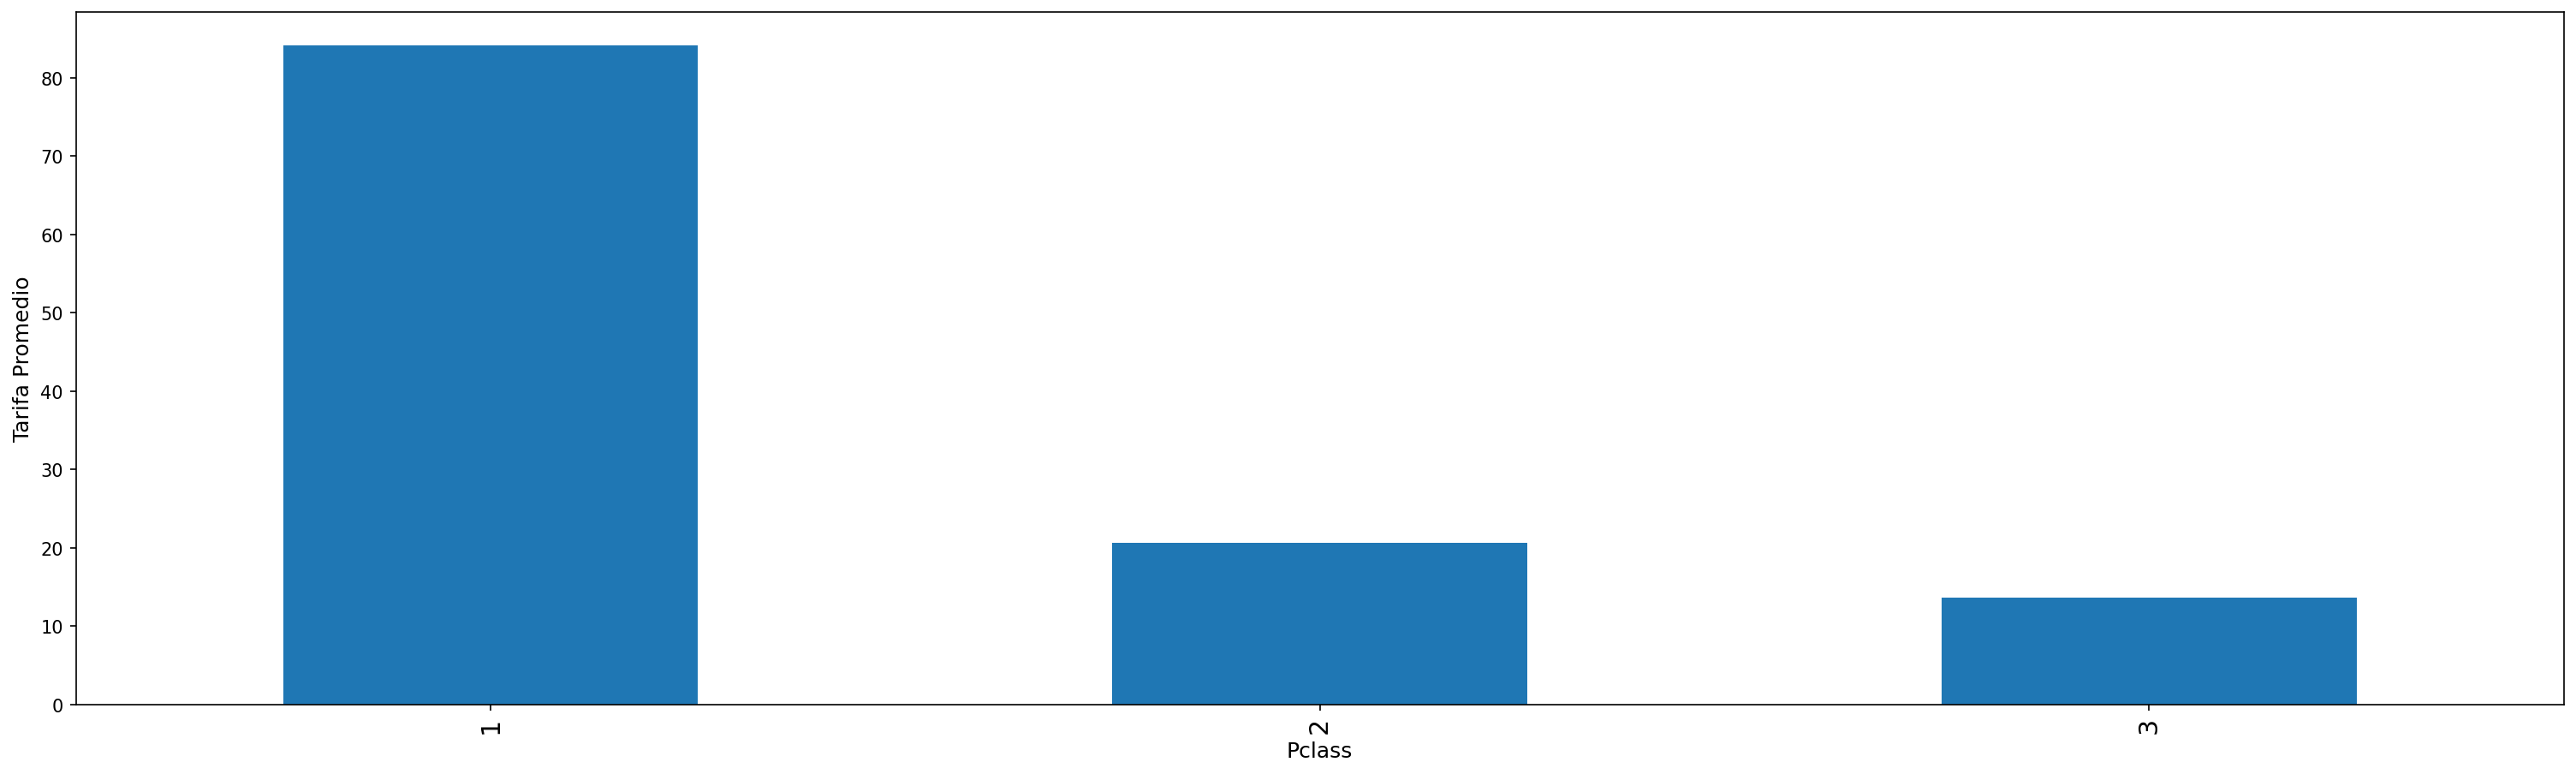

In [173]:
# Crea el gráfico después de limpiar los datos
# Crear una subtrama
ax = plt.subplot()

# Establecer etiqueta del eje y
ax.set_ylabel('Tarifa Promedio')

# Agrupar por clase y calcular el promedio de las tarifas, luego trazar un gráfico de barras
data.groupby('Pclass')['Fare'].mean().plot(kind='bar', figsize=(25, 7), ax=ax)

<Axes: xlabel='Embarked', ylabel='Fare'>

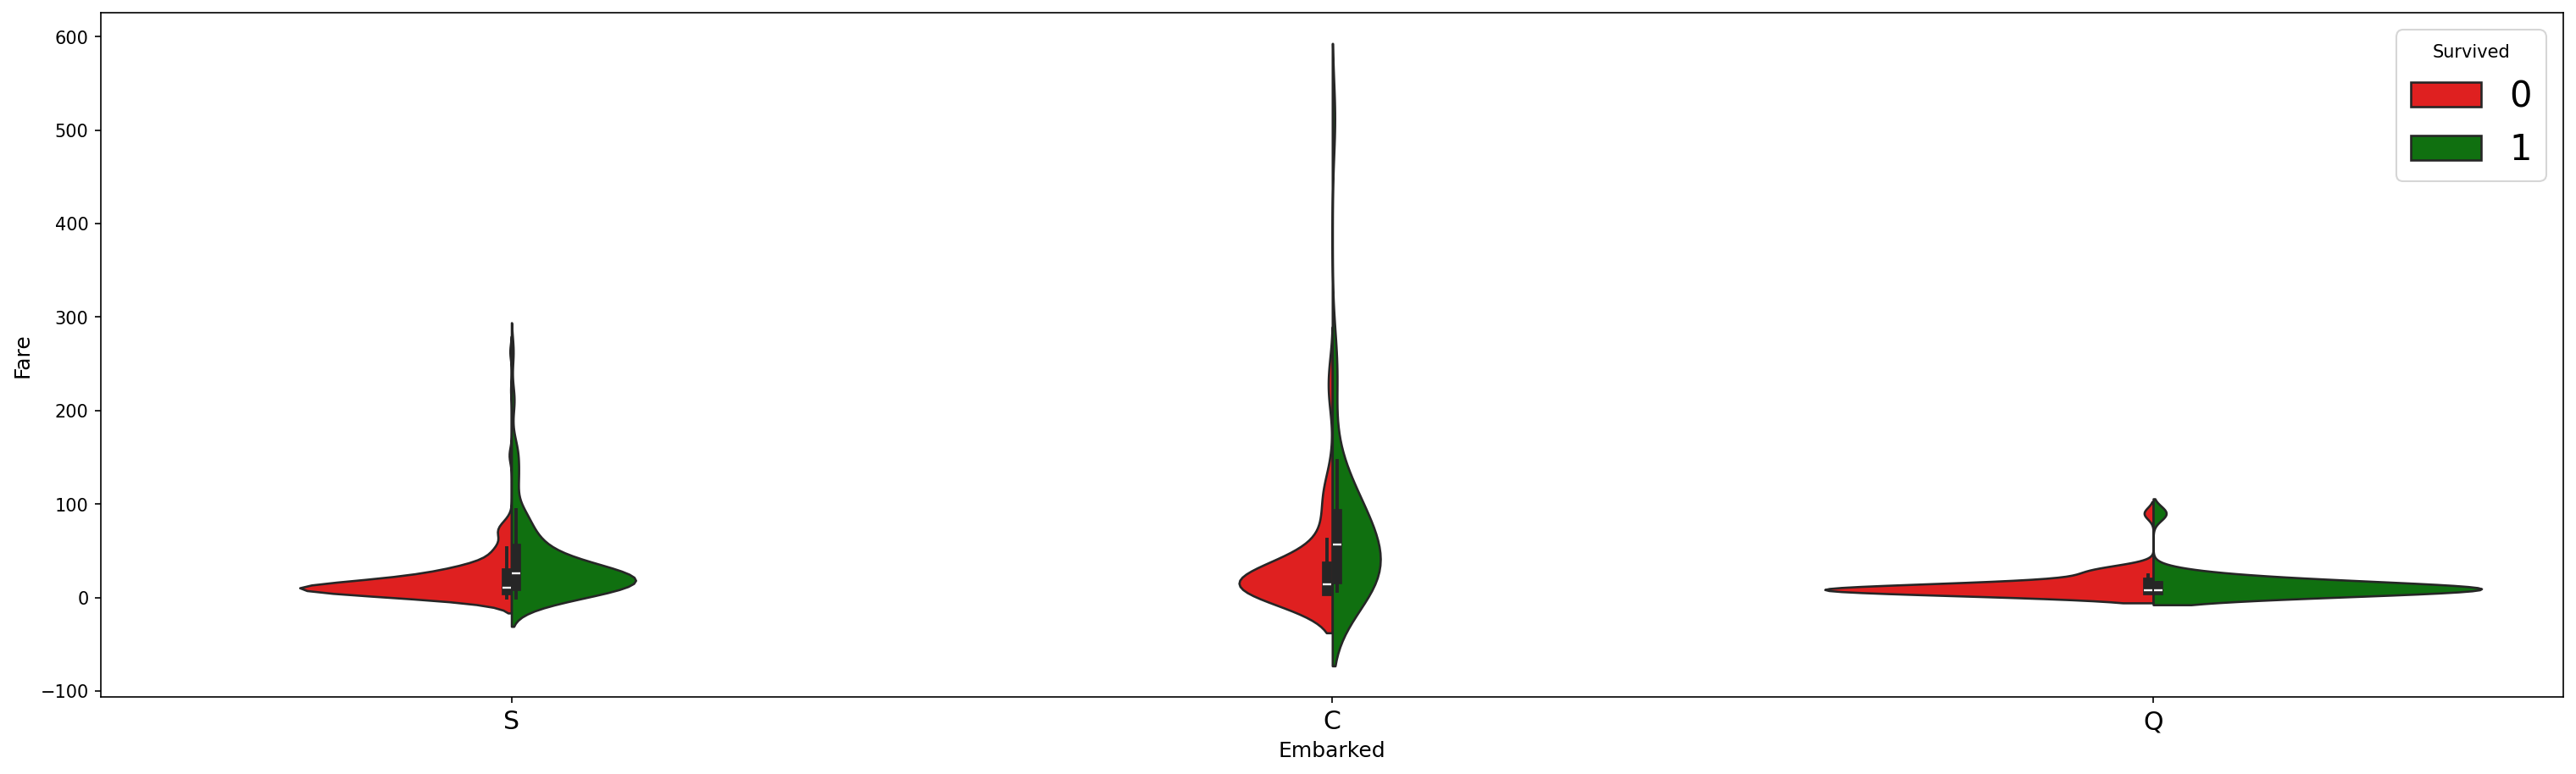

In [174]:
#relacion precio y clase
fig = plt.figure(figsize=(25, 7))

# Trama de violín para visualizar la distribución de las tarifas ('Fare') por lugar de embarque ('Embarked'),
# diferenciando por la supervivencia ('Survived')
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"})

- **Parece que la embarcación C tiene un rango más amplio de tarifas de boletos y, por lo tanto, los pasajeros que pagan las tarifas más altas son aquellos que sobreviven.**
- **También observamos que esto sucede en la embarcación S y en menor medida en la embarcación Q.**

### FEATURE ENGINEERING

- En la parte anterior, exploramos los datos y identificamos algunas correlaciones interesantes.
- En esta parte, veremos cómo procesar y transformar estas variables de manera que los datos sean manejables por un algoritmo de aprendizaje automático.
- También crearemos, las características adicionales que serán útiles en la construcción del modelo.
- A lo largo del camino, veremos cómo procesar variables de texto como los nombres de los pasajeros e integrar esta información en nuestro modelo.

In [175]:
#helper
def status(feature):
    print('Processing', feature, ': ok')

In [176]:
#datos combinados de train y set para referencia
def get_combined_data():
    train = pd.read_csv('train.csv') 
    test = pd.read_csv('test.csv')
    # obtenemos nuestros targets 
    targets = train.Survived
    # eliminar survived de train
    train.drop(['Survived'], axis=1, inplace=True)
    # merging de datos
    combined = pd.concat([train, test], ignore_index=True) 
    # eliminar PassengerId y la columna index antes creada
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined

In [177]:
combined = get_combined_data()
combined.shape

(1309, 10)

In [178]:
combined.sample(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
684,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.000,NaN,S
1061,3,"Lithman, Mr. Simon",male,NaN,0,0,S.O./P.P. 251,7.550,NaN,S
1283,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.250,NaN,S
1300,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.775,NaN,S
984,3,"Guest, Mr. Robert",male,NaN,0,0,376563,8.050,NaN,S


- Al observar los nombres de los pasajeros, uno podría preguntarse cómo procesarlos para extraer información útil.
- Notaremos que cada nombre tiene un título en él. Esto puede ser simplemente Miss o Mrs, pero a veces puede ser algo más sofisticado como Master, Sir o Doña. En ese caso, podríamos introducir información adicional sobre el estatus social simplemente analizando el nombre, extrayendo el título y convirtiéndolo en una variable binaria.

In [179]:
#extraer los titulos de los nombres
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # extraer título de cada nombre
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    # mapear cada titulo
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

In [180]:
combined = get_titles()
combined.sample(5)

Processing Title : ok


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1023,3,"Lefebre, Mrs. Frank (Frances)",female,NaN,0,4,4133,25.4667,NaN,S,Mrs
114,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C,Miss
1041,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C54,C,Mrs
1294,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S,Mr
451,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S,Mr


- Officer
- Royalty
- Mr
- Mrs
- Miss
- Master

In [181]:
#todo fue procesado?
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


- para salvar corregir el pequeño NaN, podemos segir dos formas o borramos la fila.

In [124]:
combined.dropna(subset=['Title'], inplace=True) # NO CORRER ESTE COMANDO

- o realizamos una busqueda de las personas para saber algo de ellas (en este caso pertenecias a la realeza), entones remplazamos NaN por Royalty

In [182]:
# Llenar los valores faltantes en la columna 'Title' con 'Royalty' para las filas seleccionadas
combined.loc[combined['Title'].isnull(), 'Title'] = 'Royalty'

- Hemos visto en la primera parte que la variable de Edad (Age) faltaba en 177 valores. Este es un número considerable (~ 13% del conjunto de datos). Simplemente reemplazarlos con la edad promedio o mediana podría no ser la mejor solución, ya que la edad puede diferir según los grupos y categorías de pasajeros.

- Para entender por qué, agrupemos nuestro conjunto de datos por sexo, título y clase de pasajero, y para cada subconjunto calculemos la mediana de la edad.

- Para evitar la fuga de datos desde el conjunto de prueba, completamos las edades faltantes en el conjunto de entrenamiento utilizando el conjunto de entrenamiento, y llenamos las edades en el conjunto de prueba utilizando valores calculados a partir del conjunto de entrenamiento también.

In [183]:
#ingeniería de la edad
print(combined.iloc[:891].Age.isnull().sum()) #TRAIN
print(combined.iloc[891:].Age.isnull().sum()) #TEST

177
86


In [184]:
# Crear grupos y calcular la mediana solo para la columna 'Age'
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])["Age"].median()
grouped_median_train = grouped_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

grouped_median_train.sample(5)

,Sex,Pclass,Title,Age
12,male,2,Master,1.0
0,female,1,Miss,30.0
2,female,1,Officer,49.0
13,male,2,Mr,31.0
4,female,2,Miss,24.0


In [185]:
#procesar edad
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

In [186]:
combined = process_age()
combined.sample(5)

Processing age : ok


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1071,2,"McCrie, Mr. James Matthew",male,30.0,0,0,233478,13.0000,NaN,S,Mr
252,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,Mr
653,3,"O'Leary, Miss. Hanora ""Norah""",female,18.0,0,0,330919,7.8292,NaN,Q,Miss
441,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5000,NaN,S,Mr
1144,3,"Salander, Mr. Karl Johan",male,24.0,0,0,7266,9.3250,NaN,S,Mr


In [187]:
def process_names():
    global combined
    
    # Nos desacemos de la columna name 
    combined.drop('Name', axis=1, inplace=True)
    
    # Hacemos One-Hot encoding con title con un prefijo de Tite
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')

    # Convertimos a 1 y 0
    titles_dummies = titles_dummies.astype(int)
    
    # Concatenate the dummy variables to the original DataFrame
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # Removing the 'Title' variable
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined

In [188]:
combined = process_names()
combined.sample(5)

Processing names : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
806,1,male,39.0,0,0,112050,0.0000,A36,S,0,0,1,0,0,0
548,3,male,33.0,1,1,363291,20.5250,NaN,S,0,0,1,0,0,0
194,1,female,44.0,0,0,PC 17610,27.7208,B4,C,0,0,0,1,0,0
397,2,male,46.0,0,0,28403,26.0000,NaN,S,0,0,1,0,0,0
225,3,male,22.0,0,0,PP 4348,9.3500,NaN,S,0,0,1,0,0,0


In [189]:
#procesar precio
def process_fares():
    global combined
    # reemplazar con el promedio
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

In [190]:
combined = process_fares()
combined.sample(5)

Processing fare : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
525,3,male,40.5,0,0,367232,7.7500,NaN,Q,0,0,1,0,0,0
735,3,male,28.5,0,0,54636,16.1000,NaN,S,0,0,1,0,0,0
463,2,male,48.0,0,0,234360,13.0000,NaN,S,0,0,1,0,0,0
1188,3,male,26.0,2,0,2662,21.6792,NaN,C,0,0,1,0,0,0
362,3,female,45.0,0,1,2691,14.4542,NaN,C,0,0,0,1,0,0


In [191]:
#PRACTICA 2-- realizar un procesamiento similar para embarque - faltan valores

In [192]:
#SOLUCION procesar embarque
def process_embarked():
    global combined
    # reemplazar con S - el mas frecuente
    combined.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    embarked_dummies  = embarked_dummies.astype(int)
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

In [193]:
combined = process_embarked()
combined.sample(5)

Processing embarked : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
661,3,male,40.0,0,0,2623,7.2250,NaN,0,0,1,0,0,0,1,0,0
108,3,male,38.0,0,0,349249,7.8958,NaN,0,0,1,0,0,0,0,0,1
764,3,male,16.0,0,0,347074,7.7750,NaN,0,0,1,0,0,0,0,0,1
181,2,male,31.0,0,0,SC/PARIS 2131,15.0500,NaN,0,0,1,0,0,0,1,0,0
826,3,male,26.0,0,0,1601,56.4958,NaN,0,0,1,0,0,0,0,0,1


- No tenemos ninguna letra de cabina en el conjunto de prueba que no esté presente en el conjunto de entrenamiento.

In [194]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

print(train_cabin)
print(test_cabin)

{'E', 'G', 'U', 'T', 'C', 'D', 'A', 'F', 'B'}
{'E', 'G', 'U', 'C', 'D', 'A', 'F', 'B'}


In [195]:
#procesar cabina
def process_cabin():
    global combined    
    # reemplazar por U
    combined.Cabin.fillna('U', inplace=True)
    # mapear a cada letra
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    cabin_dummies = cabin_dummies.astype(int)
    combined = pd.concat([combined, cabin_dummies], axis=1)
    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined

In [196]:
combined = process_cabin()
combined.sample(5)

Processing cabin : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
1210,2,male,22.0,2,0,C.A. 31029,31.500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
380,1,female,42.0,0,0,PC 17757,227.525,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
937,1,male,45.0,0,0,PC 17594,29.700,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
812,2,male,35.0,0,0,28206,10.500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
58,2,female,5.0,1,2,C.A. 34651,27.750,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [197]:
#procesar sexo
from sklearn.preprocessing import LabelEncoder

def process_sex():
    global combined
    # cambiar a número
    LE = LabelEncoder()
    combined['Sex'] = LE.fit_transform(combined['Sex'])
    status('Sex')
    return combined

- Esta función toma una entrada de cadena ('male' o 'female') y devuelve el valor numérico correspondiente (1 o 0).

In [198]:
combined = process_sex()
combined.sample(5)

Processing Sex : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
588,3,1,22.0,0,0,14973,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
94,3,1,59.0,0,0,364500,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1308,3,1,4.0,1,1,2668,22.3583,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1200,3,0,45.0,1,0,350026,14.1083,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
765,1,0,51.0,1,0,13502,77.9583,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [199]:
#procesar clase
def process_pclass():  
    global combined
    # codificar
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    pclass_dummies = pclass_dummies.astype(int)
    # agregar dummy variable
    combined = pd.concat([combined, pclass_dummies],axis=1)
    # quitar "Pclass"
    combined.drop('Pclass', axis=1, inplace=True) 
    status('Pclass')
    return combined

In [200]:
combined = process_pclass()
combined.sample(5)

Processing Pclass : ok


,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
437,0,24.0,2,3,29106,18.75,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
214,1,26.0,1,0,367229,7.75,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
811,1,39.0,0,0,A/4 48871,24.15,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
530,0,2.0,1,1,26360,26.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
759,0,33.0,0,0,110152,86.50,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [201]:
#procesar ticket
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    #sum(1 for _ in filter(lambda x: x > 3, n))
    res = len(ticket)
    if res > 0:
        return ticket[0]
    else: 
        return 'XXX'

tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

print(len(tickets))

def process_ticket():  
    global combined
    # extraer prefijo
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        res = len(ticket)
        if res > 0:
            return ticket[0]
        else: 
            return 'XXX'
    
    # dummy:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    tickets_dummies = tickets_dummies.astype(int)
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined

37


In [202]:
combined = process_ticket()
combined.sample(5)

Processing Ticket : ok


,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
347,0,31.0,1,0,16.1000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
870,1,26.0,0,0,7.8958,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
247,0,24.0,0,2,14.5000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1096,1,40.0,0,0,25.7417,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1183,1,26.0,0,0,7.2292,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [203]:
#crear variables familia
def process_family():
    global combined
    # tamaño de familia
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    # crear otros tamaños
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    status('family')
    return combined

In [204]:
combined = process_family()
combined.sample(5)

Processing family : ok


,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
964,1,28.5,0,0,27.7208,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
154,1,26.0,0,0,7.3125,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
251,0,29.0,1,1,10.4625,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,1,0
612,0,18.0,1,0,15.5000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
860,1,41.0,2,0,14.1083,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,1,0


In [205]:
combined.shape

(1309, 67)

### Models & Training

In [206]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [207]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [208]:
def recover_train_test_target():
    global combined
    targets = pd.read_csv('train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]  
    return train, test, targets

In [209]:
train, test, targets = recover_train_test_target()

In [210]:
#muchos campos, estimar importancia de cada uno
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

<Axes: ylabel='feature'>

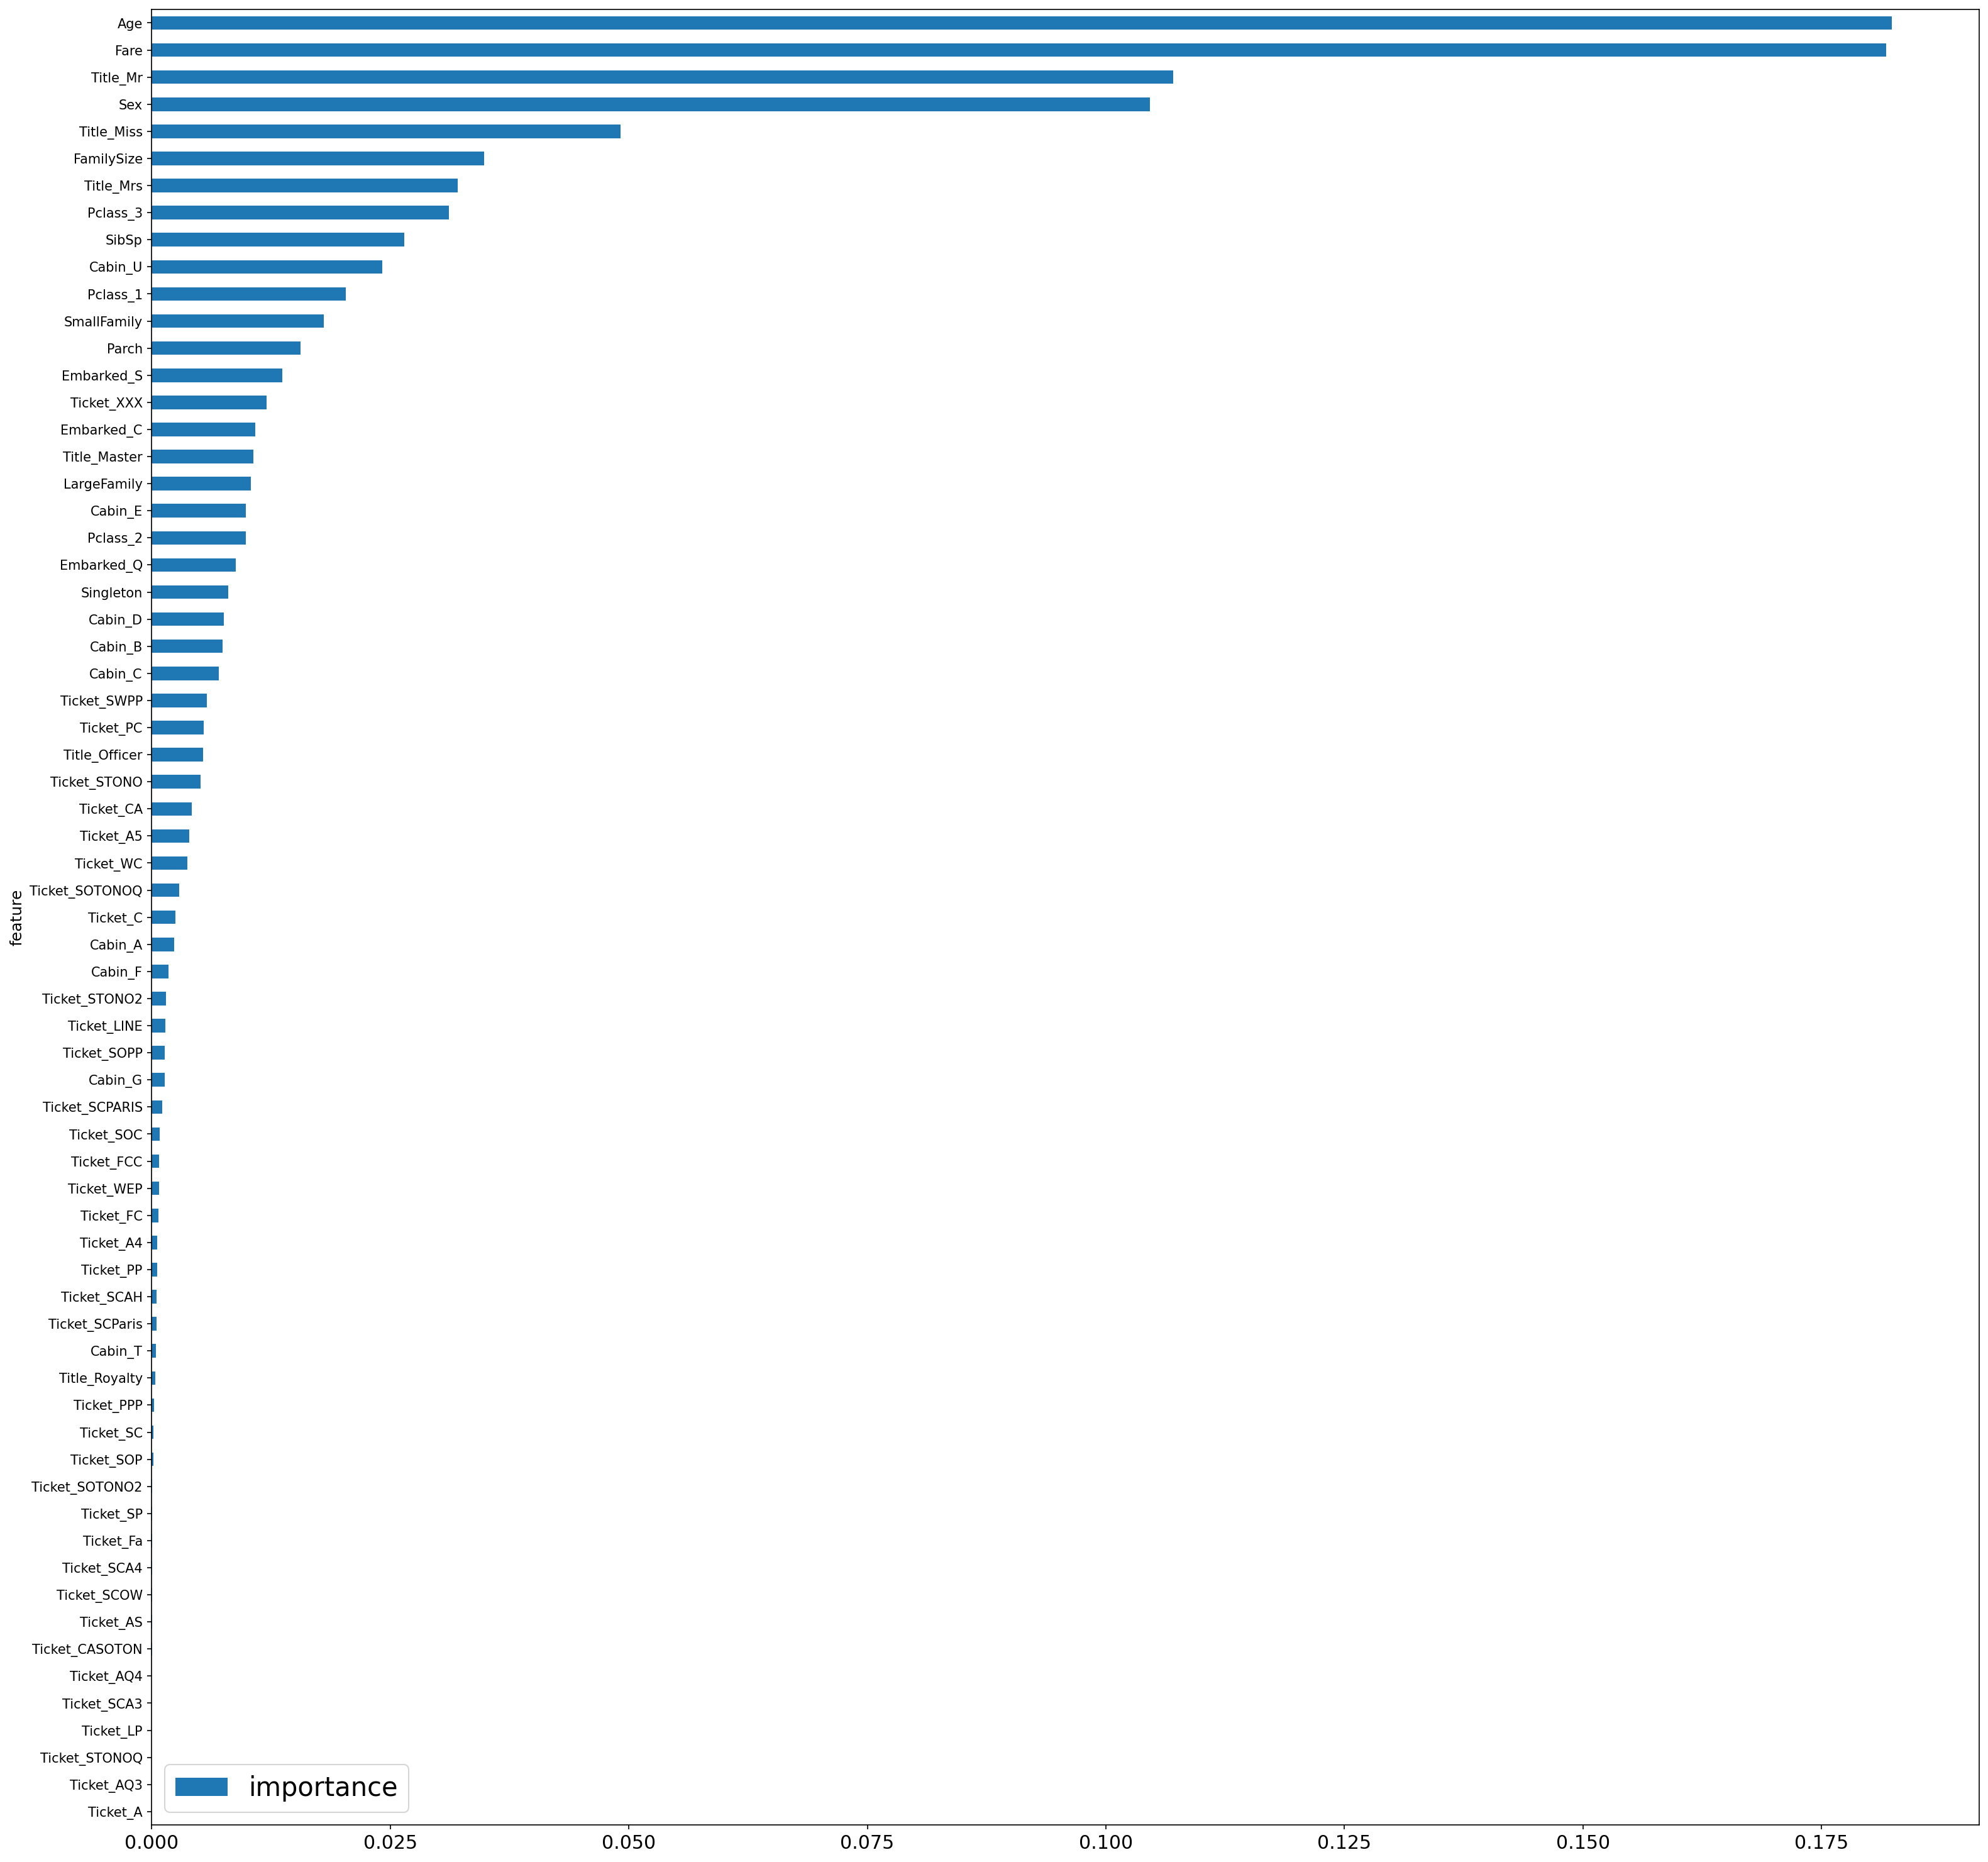

In [211]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(25, 25))

In [212]:
combined.sample(5)

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
235,0,18.0,0,0,7.5500,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
30,1,40.0,0,0,27.7208,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
520,0,30.0,0,0,93.5000,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
962,1,21.0,0,0,7.8958,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
1000,1,18.5,0,0,13.0000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [213]:
#seleccionar campos más relevantes
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)

test_reduced = model.transform(test)
print(test_reduced.shape)

(891, 13)
(418, 13)


In [214]:
print(train_reduced)

[[ 1. 22.  1. ...  1.  2.  1.]
 [ 0. 38.  1. ...  0.  2.  1.]
 [ 0. 26.  0. ...  1.  1.  0.]
 ...
 [ 0. 18.  1. ...  1.  4.  1.]
 [ 1. 26.  0. ...  0.  1.  0.]
 [ 1. 32.  0. ...  1.  1.  0.]]


In [215]:
print(test_reduced)

[[ 1.  34.5  0.  ...  1.   1.   0. ]
 [ 0.  47.   1.  ...  1.   2.   1. ]
 [ 1.  62.   0.  ...  0.   1.   0. ]
 ...
 [ 1.  38.5  0.  ...  1.   1.   0. ]
 [ 1.  26.   0.  ...  1.   1.   0. ]
 [ 1.   4.   1.  ...  1.   3.   1. ]]


In [216]:
#evaluación
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
models = [logreg, logreg_cv, rf, gboost]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.819295712761283
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.822666499278137
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8137028435126483
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.830525390747599
****
